# STROKE prediction using Random Forest Classifier and SVM model

##### The dataset below lists multiple features like gender, age, glucose level, BMI, smoking status, other comorbidities, etc., and the target variable: stroke. Each row specifies a patient’s relevant information.

#### Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Prem\\Desktop\\stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Handling of NaN values - Replacing with median value

In [7]:
df1 = df.drop(['id'], axis = 'columns')
df1.shape

(5110, 11)

In [8]:
# Filling the NaN values in bmi column by calculating the median value 

df1['bmi'] = df1['bmi'].fillna(df1.bmi.median())

In [9]:
df1.isna().values.any()

False

In [10]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Handling Of Outliers  - Using Z score to remove the outliers 

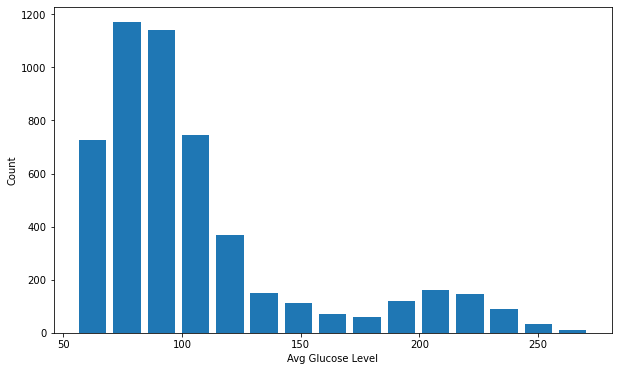

In [11]:
plt.hist(df1.avg_glucose_level, bins=15, rwidth=0.8)
plt.xlabel('Avg Glucose Level')
plt.ylabel('Count')
plt.show()

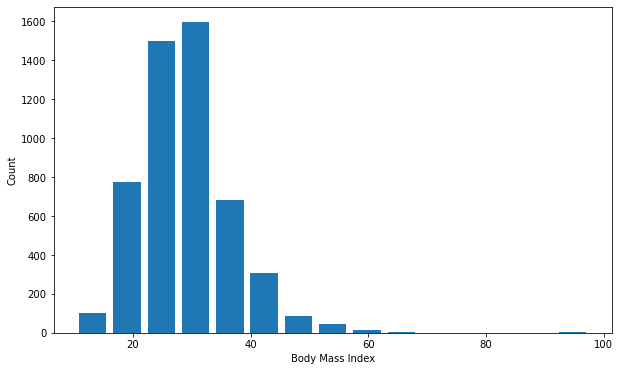

In [12]:
plt.hist(df1.bmi, bins=15, rwidth=0.8)
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.show()

In [13]:
# Z score indicates how many standard deviation away a data point is from the mean.
# Z = (x - mean)/S.D, where x is the data point value.

df1['Glucose_Zscore'] = (df1.avg_glucose_level - df1.avg_glucose_level.mean())/df1.avg_glucose_level.std()


In [14]:
# Figuring out data points with Zscore more than or less than 3. i.e figuring out the outliers

df1[(df1.Glucose_Zscore<-3) | (df1.Glucose_Zscore>3)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_Zscore
33,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1,3.236767
45,Male,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1,3.034928
122,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1,3.389361
123,Male,56.0,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1,3.161464
135,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1,3.470847
193,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,3.656787
196,Male,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1,3.011519
220,Male,81.0,1,1,Yes,Private,Urban,250.89,28.1,smokes,1,3.196355
243,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,3.121714
256,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,3.033823


In [15]:
# Filtering the Outliers from the dataset

df2 = df1[(df1.Glucose_Zscore>-3) & (df1.Glucose_Zscore<3)]
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_Zscore
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2.706111
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,2.121351
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,-0.005028
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.437217
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.501038


In [16]:
# To find how many outliers was removed from the dataset

df1.shape[0] - df2.shape[0]

49

In [17]:
# Same Approach we approch to remove the outliers in the bmi column

import warnings 
warnings.filterwarnings('ignore')

df2['bmi_Zscore'] = (df2.bmi - df2.bmi.mean())/df2.bmi.std()
df2[(df2.bmi_Zscore<-3) | (df2.bmi_Zscore>3)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_Zscore,bmi_Zscore
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1,2.604749,3.602689
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,2.201512,3.343157
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,0.516574,4.160684
333,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0,-0.527955,3.356133
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,-0.612754,4.666772
430,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0,-0.736640,3.356133
466,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0,1.411159,4.069848
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,2.303978,5.588113
637,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0,0.138733,3.343157
662,Male,28.0,0,0,Yes,Private,Urban,87.43,55.7,Unknown,0,-0.413344,3.485899


In [18]:
df3 = df2[(df2.bmi_Zscore>-3) & (df2.bmi_Zscore<3)]
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_Zscore,bmi_Zscore
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2.706111,1.007364
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,2.121351,-0.095649
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,-0.005028,0.475322
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.437217,0.721878
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.501038,-0.627691


In [19]:
# To find how many outliers was removed from the dataset

df2.shape[0] - df3.shape[0]

59

In [20]:
# The Outliers have been removed from the dataframe. Drop the Zscore values from the dataframe

df4 = df3.drop(['Glucose_Zscore','bmi_Zscore'], axis = 'columns')
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
df4.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,42.985406,0.093762,0.053179,104.533820,28.490624,0.047781
std,22.665545,0.291527,0.224412,42.892413,6.997648,0.213324
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.072500,23.600000,0.000000
50%,44.000000,0.000000,0.000000,91.575000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,112.960000,32.500000,0.000000
max,82.000000,1.000000,1.000000,240.860000,51.900000,1.000000


In [22]:
df4.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Converting the object type values in the column to integer type using Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

LabelEncode = LabelEncoder()
Labels = LabelEncode.fit_transform(df4.gender)
df4['Gender'] = Labels
df4.drop(columns = ['gender'], axis = 1, inplace = True)
df4.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [24]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
Labels1 = LabelEncode.fit_transform(df4.ever_married)
df4['Marital_Status'] = Labels1
df4.drop(columns = ['ever_married'], axis = 1, inplace = True)
df4.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Marital_Status
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,61.0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1,0,1
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


In [26]:
Labels2 = LabelEncode.fit_transform(df4.Residence_type)
df4['residence_type'] = Labels2
df4.drop(columns = ['Residence_type'], axis = 1, inplace = True)

In [27]:
df4.tail(15)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Marital_Status,residence_type
5095,1.08,0,0,children,79.15,17.4,Unknown,0,1,0,0
5096,57.00,0,0,Govt_job,76.62,28.2,never smoked,0,1,1,0
5097,68.00,0,0,Self-employed,91.68,40.8,Unknown,0,1,1,1
5098,9.00,0,0,children,71.88,17.5,Unknown,0,1,0,1
5099,40.00,0,0,Private,83.94,28.1,smokes,0,1,1,0
5100,82.00,1,0,Self-employed,71.97,28.3,never smoked,0,1,1,0
5101,45.00,0,0,Private,97.95,24.5,Unknown,0,0,1,1
5102,57.00,0,0,Private,77.93,21.7,never smoked,0,0,1,0
5103,18.00,0,0,Private,82.85,46.9,Unknown,0,0,0,1
5104,13.00,0,0,children,103.08,18.6,Unknown,0,0,0,0


In [28]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [29]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
Labels3 = LabelEncode.fit_transform(df4.work_type)
df4['Work_type'] = Labels3
df4.drop(columns = ['work_type'], axis = 1, inplace = True)
df4.tail(15)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Gender,Marital_Status,residence_type,Work_type
5095,1.08,0,0,79.15,17.4,Unknown,0,1,0,0,4
5096,57.00,0,0,76.62,28.2,never smoked,0,1,1,0,0
5097,68.00,0,0,91.68,40.8,Unknown,0,1,1,1,3
5098,9.00,0,0,71.88,17.5,Unknown,0,1,0,1,4
5099,40.00,0,0,83.94,28.1,smokes,0,1,1,0,2
5100,82.00,1,0,71.97,28.3,never smoked,0,1,1,0,3
5101,45.00,0,0,97.95,24.5,Unknown,0,0,1,1,2
5102,57.00,0,0,77.93,21.7,never smoked,0,0,1,0,2
5103,18.00,0,0,82.85,46.9,Unknown,0,0,0,1,2
5104,13.00,0,0,103.08,18.6,Unknown,0,0,0,0,4


In [31]:
Labels4 = LabelEncode.fit_transform(df4.smoking_status)
df4['Smoking_status'] = Labels4
df4.drop(columns = ['smoking_status'], axis = 1, inplace = True)
df4.tail(15)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender,Marital_Status,residence_type,Work_type,Smoking_status
5095,1.08,0,0,79.15,17.4,0,1,0,0,4,0
5096,57.00,0,0,76.62,28.2,0,1,1,0,0,2
5097,68.00,0,0,91.68,40.8,0,1,1,1,3,0
5098,9.00,0,0,71.88,17.5,0,1,0,1,4,0
5099,40.00,0,0,83.94,28.1,0,1,1,0,2,3
5100,82.00,1,0,71.97,28.3,0,1,1,0,3,2
5101,45.00,0,0,97.95,24.5,0,0,1,1,2,0
5102,57.00,0,0,77.93,21.7,0,0,1,0,2,2
5103,18.00,0,0,82.85,46.9,0,0,0,1,2,0
5104,13.00,0,0,103.08,18.6,0,0,0,0,4,0


In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5002 non-null   float64
 1   hypertension       5002 non-null   int64  
 2   heart_disease      5002 non-null   int64  
 3   avg_glucose_level  5002 non-null   float64
 4   bmi                5002 non-null   float64
 5   stroke             5002 non-null   int64  
 6   Gender             5002 non-null   int32  
 7   Marital_Status     5002 non-null   int32  
 8   residence_type     5002 non-null   int32  
 9   Work_type          5002 non-null   int32  
 10  Smoking_status     5002 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 371.2 KB


####  Data Visualization in Seaborn to understand the relationship between the different features in the dataset

<AxesSubplot:xlabel='stroke', ylabel='count'>

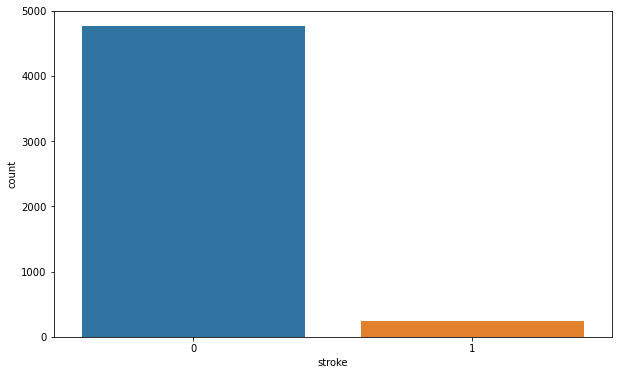

In [53]:
import seaborn as sns

sns.countplot(x='stroke', data = df4)

#### It seems that the taget variable is highly imbalanced

#### Univariate Analysis

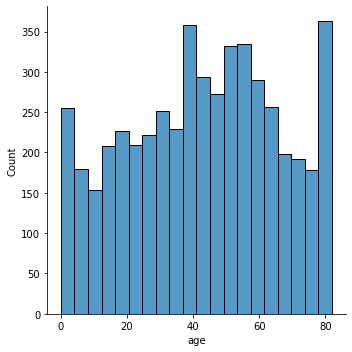

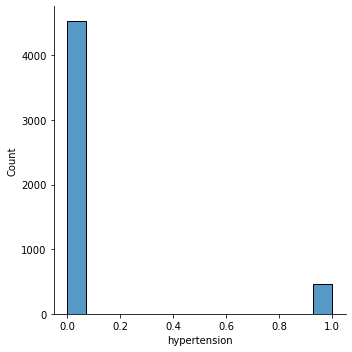

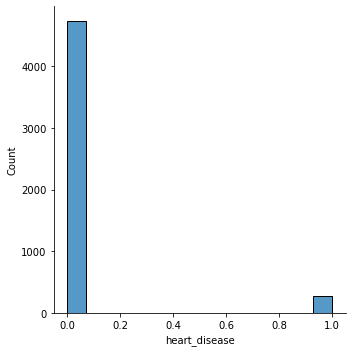

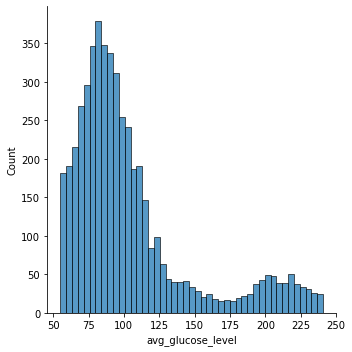

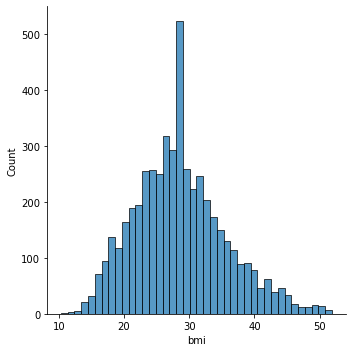

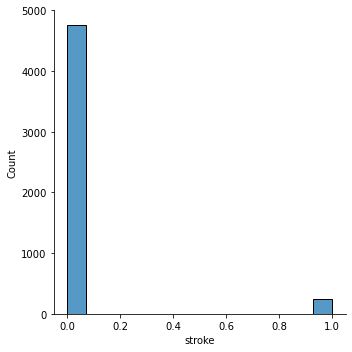

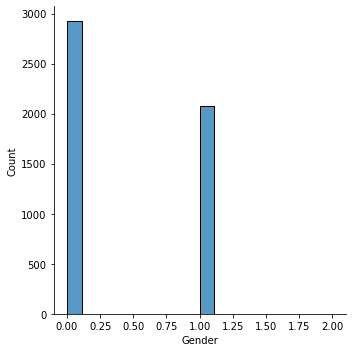

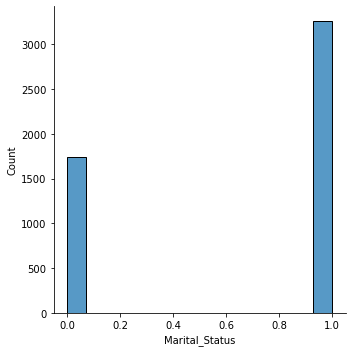

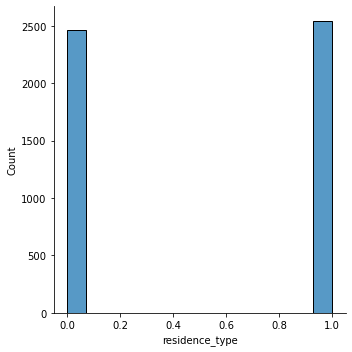

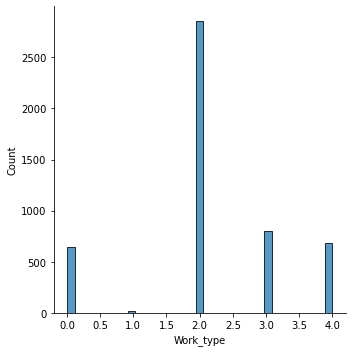

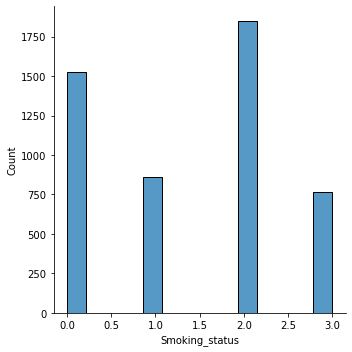

In [55]:
for column in df4:
    sns.displot(x=column, data=df4)

#### Bivariate Analysis

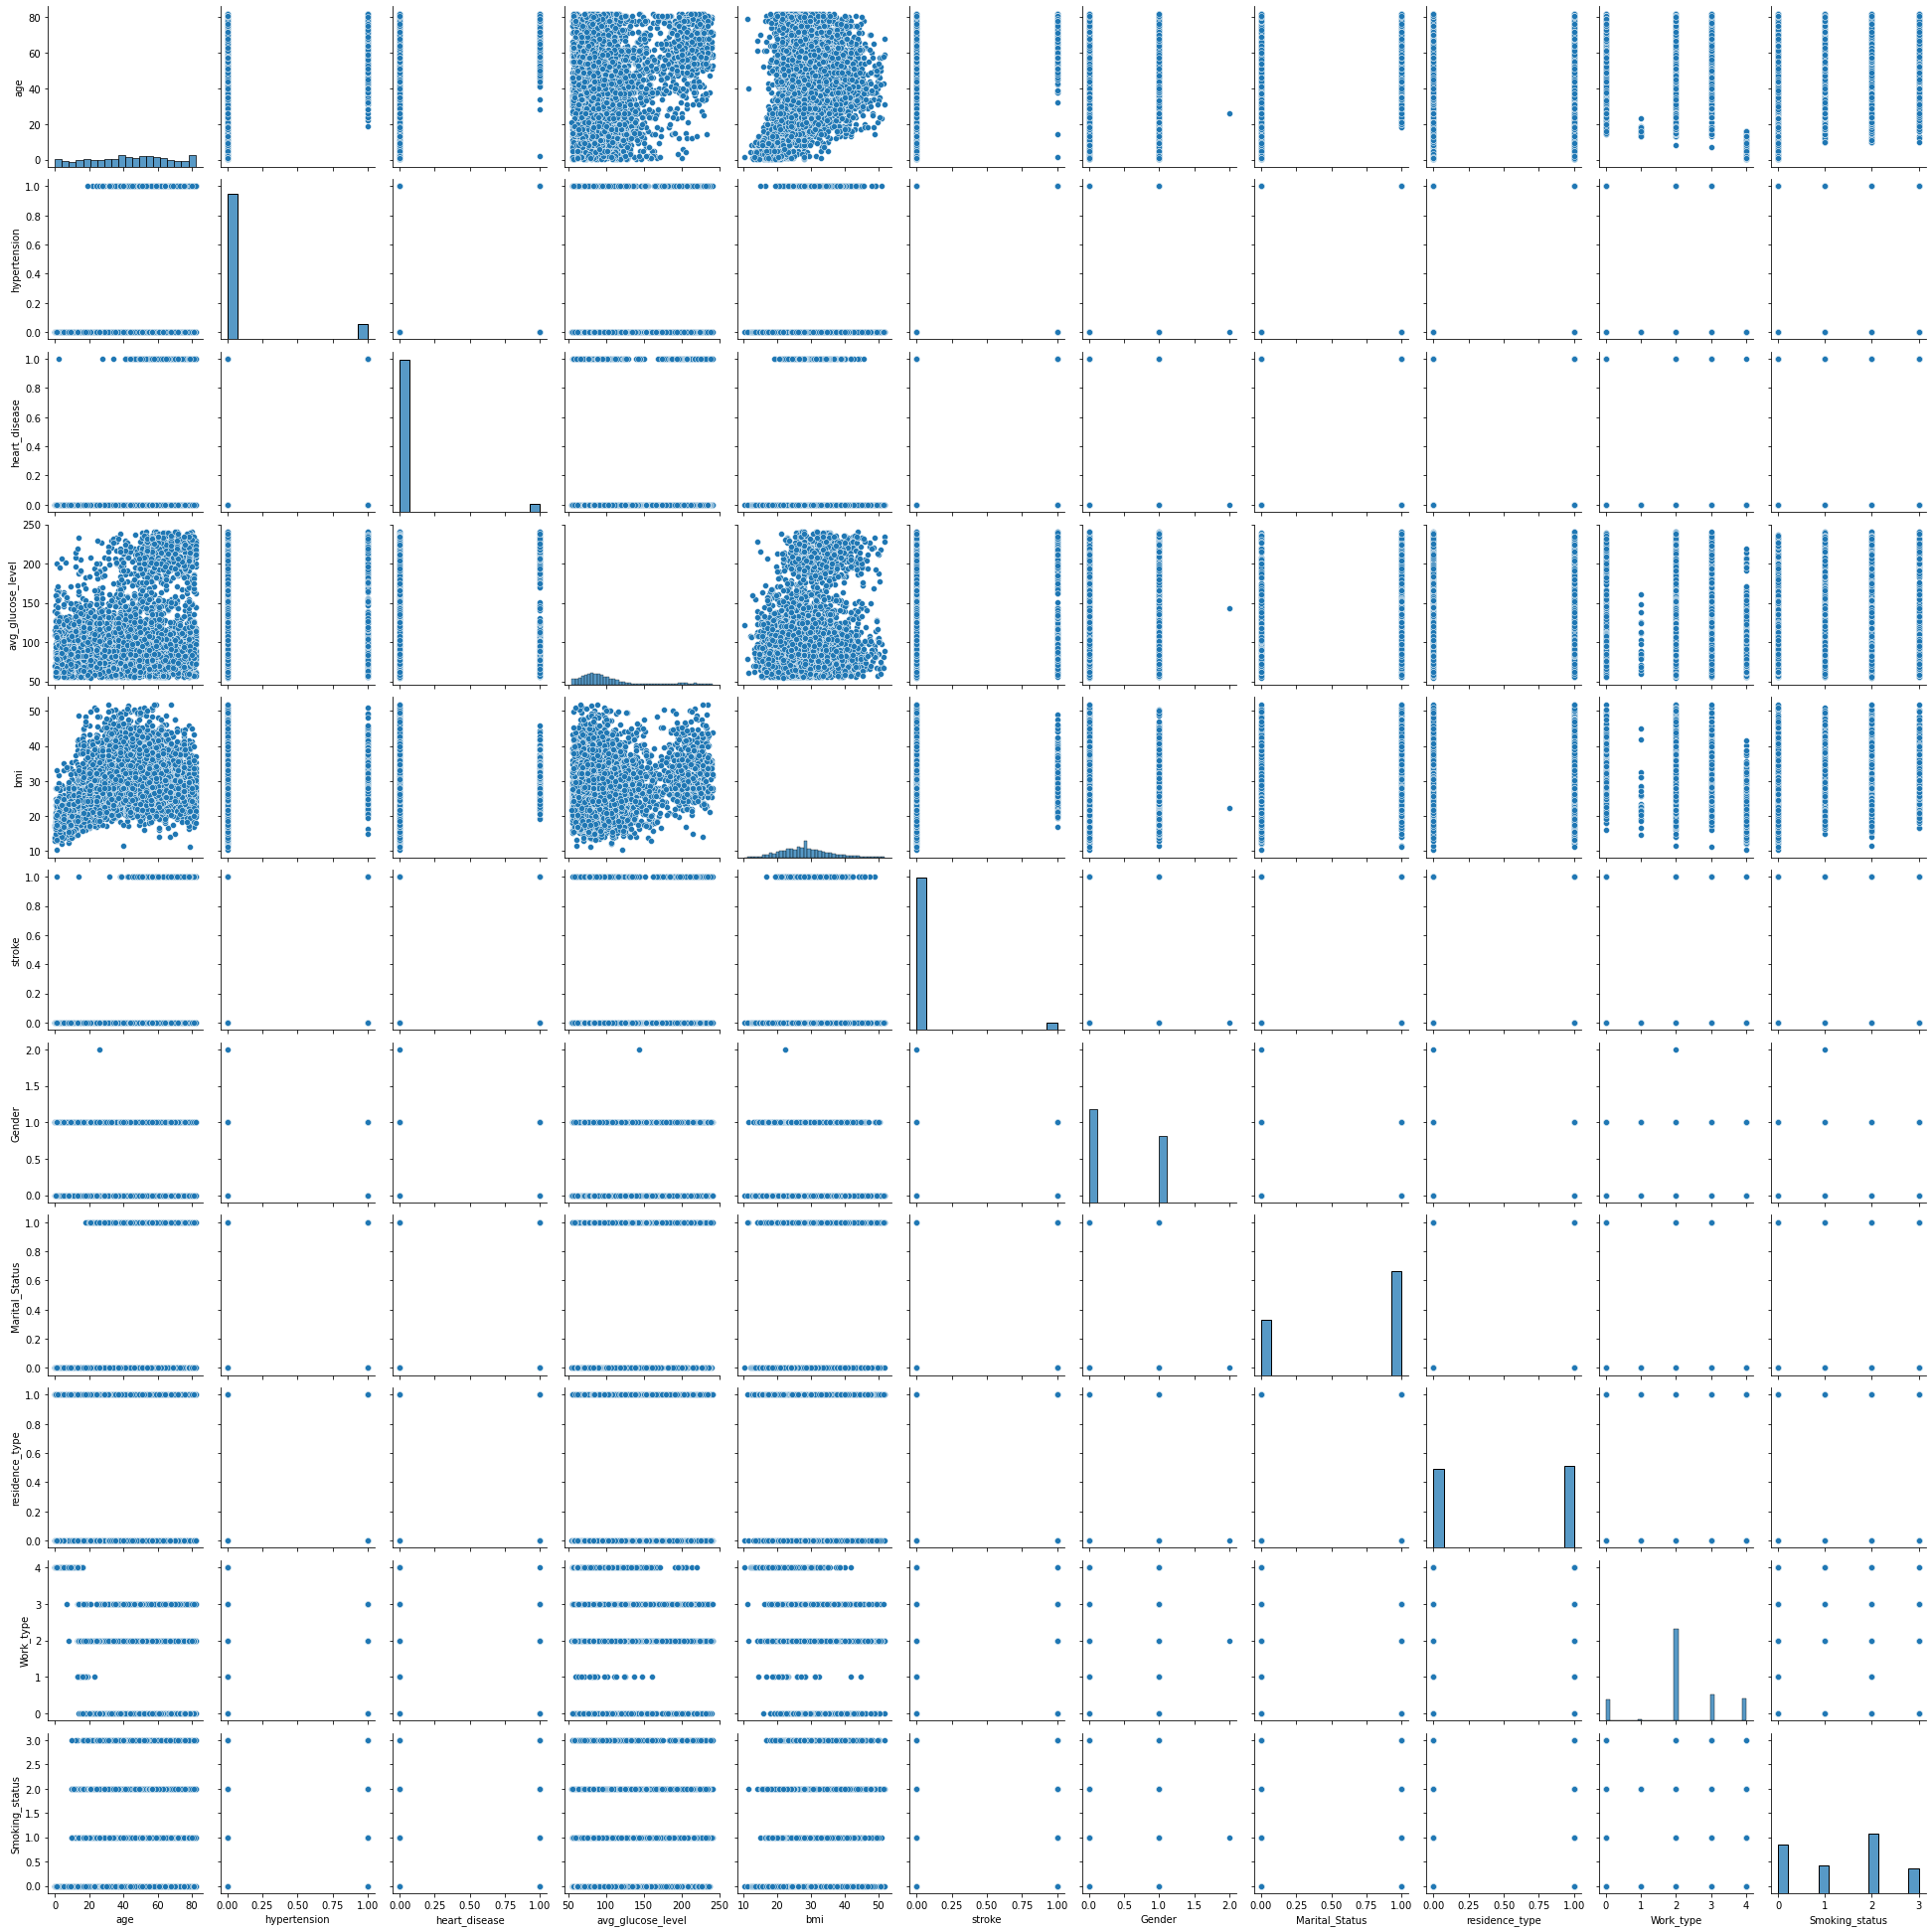

In [56]:
# Pairplots to identify the relationship between the different features 

sns.pairplot(df4)

#### Box Plot to check for outliers

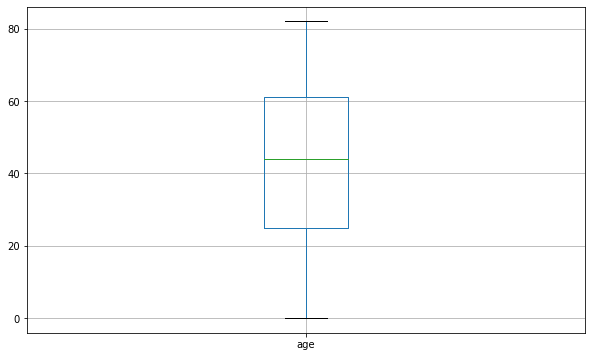

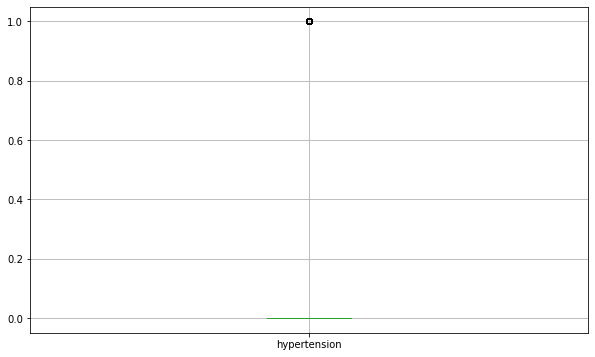

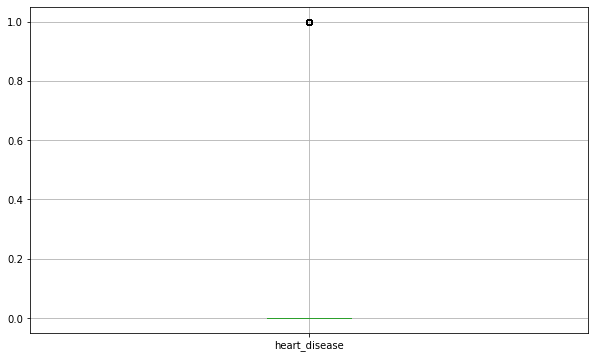

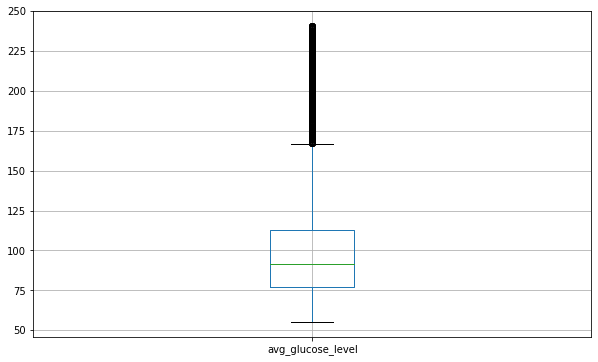

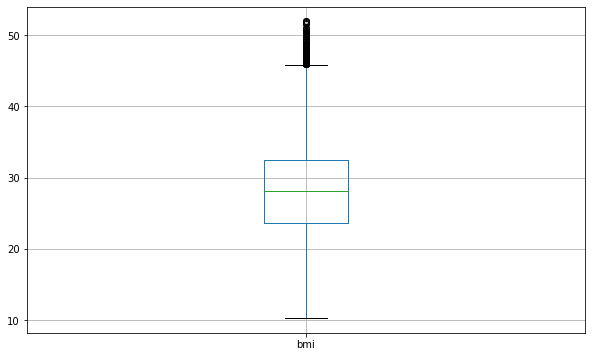

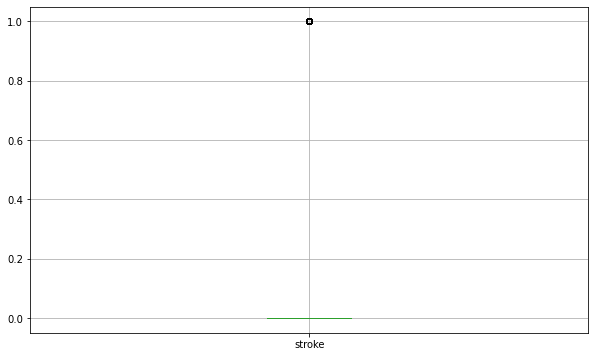

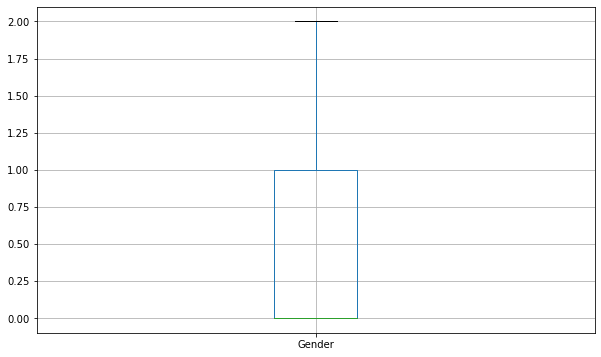

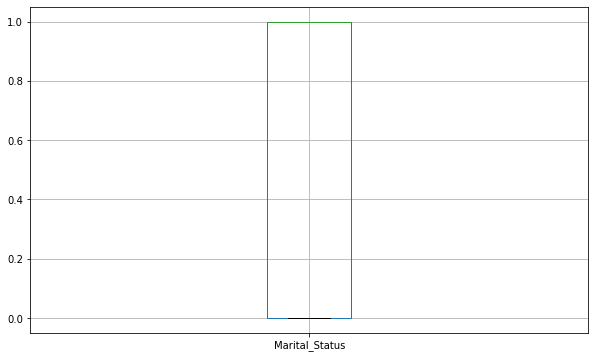

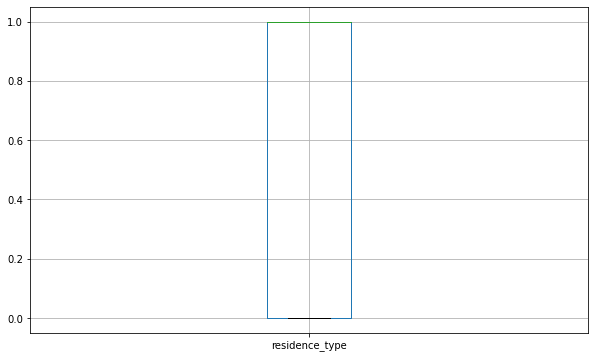

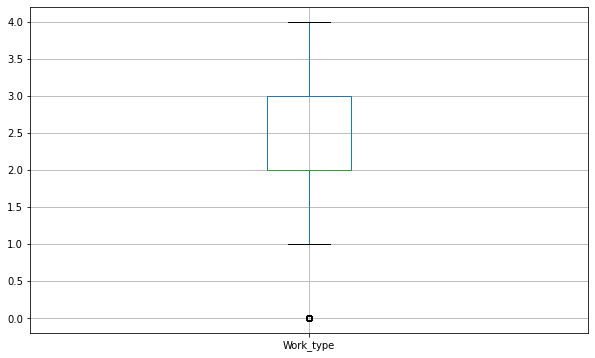

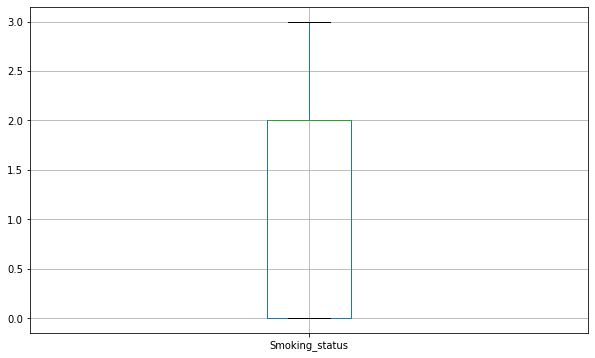

In [57]:
for column in df4:
    plt.figure()
    df4.boxplot([column])

#### Heatmap to understand the correaltion between the Variables

<AxesSubplot:>

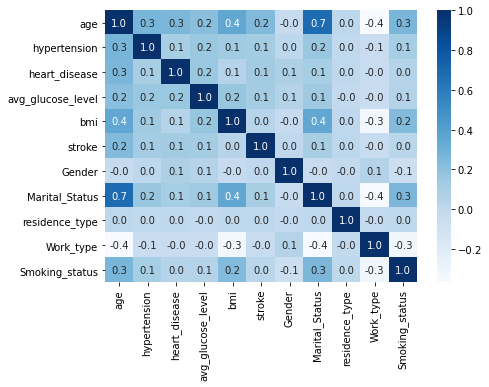

In [70]:
import seaborn as sns
correlation_matrix = df4.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')


##### Observation: 
From the above correlation matrix, it seems thats the independent variables like Marital_status and age are highly correlated. so we will drop any one of them. And also it seems that bmi, gender, Marital status, residence type, work type, smoking status are not have much relationship with our target variable stroke. so we will drop all these irrelavant columns

In [33]:
df4.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender,Marital_Status,residence_type,Work_type,Smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,1,2,1
1,61.0,0,0,202.21,28.1,1,0,1,0,3,2
2,80.0,0,1,105.92,32.5,1,1,1,0,2,2
3,49.0,0,0,171.23,34.4,1,0,1,1,2,3
4,79.0,1,0,174.12,24.0,1,0,1,0,3,2


In [34]:
df5 = df4.drop(['bmi','Gender','Marital_Status','residence_type','Work_type','Smoking_status'], axis='columns')
df5.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
1,61.0,0,0,202.21,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1


#### Handling the Imbalance in the dataset for the Target Variable

In [35]:
# Checking the distribution of the Target Variable for imbalance in the dataset
df5.stroke.value_counts()

0    4763
1     239
Name: stroke, dtype: int64

#### There is a imbalance in the Dataset. We can address this using SMOTE (Synthetic Minority Over-sampling Technique)

In [36]:
X = df5.drop('stroke',axis ='columns')
y = df5['stroke']

In [37]:
from  imblearn.over_sampling import SMOTE


In [39]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    4763
1    4763
Name: stroke, dtype: int64

#### To check the performance of the Model using Random Forest Classifier 

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [47]:
y_train.value_counts()

0    3810
1    3810
Name: stroke, dtype: int64

In [48]:
y_test.value_counts()

0    953
1    953
Name: stroke, dtype: int64

In [50]:
# Importing and testing the Random Classifier Model for the prediction score

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
model.score(X_test,y_test)

0.922875131164743

In [54]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       953
           1       0.92      0.93      0.92       953

    accuracy                           0.92      1906
   macro avg       0.92      0.92      0.92      1906
weighted avg       0.92      0.92      0.92      1906



#### Confusion Matrix to see the distribution of errors

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[873,  80],
       [ 67, 886]], dtype=int64)

Text(69.0, 0.5, 'truth')

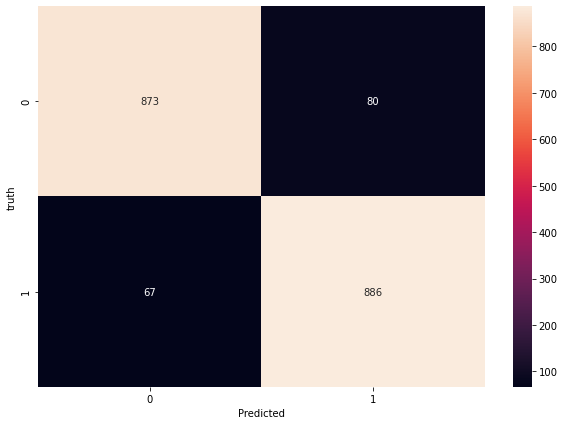

In [66]:
# Plotting in Seaborn for better Visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

#### Predicting the score using SVM(Support vector Machine) Algorithm

In [64]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train,y_train)

SVC()

In [60]:
model_svc.score(X_test,y_test)

0.7796432318992654

In [61]:
y_pred_1 = model_svc.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       953
           1       0.75      0.83      0.79       953

    accuracy                           0.78      1906
   macro avg       0.78      0.78      0.78      1906
weighted avg       0.78      0.78      0.78      1906



Text(69.0, 0.5, 'truth')

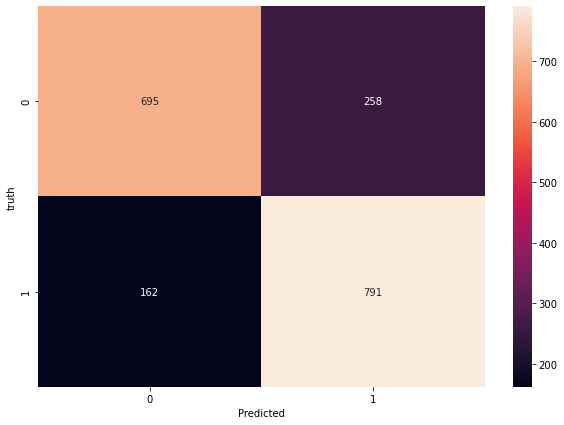

In [67]:
cm_1 = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize = (10,7))
sn.heatmap(cm_1, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')